In [1]:
# importamos librerias de nuestro interes para el proyecto
from google.colab import drive
from PIL import Image
from IPython.display import display
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Montar Google Drive
drive.mount('/content/drive')

Mounted at /content/drive


#Análisis del Tiro Oblicuo: Trayectoria y Cinemática

Introducción:
El tiro oblicuo es un concepto fundamental en la física que involucra el movimiento de un objeto lanzado en un ángulo respecto a la horizontal. Este fenómeno se encuentra presente en numerosas situaciones cotidianas.

>Este proyecto se centra en analizar la trayectoria y la cinemática de un objeto en tiro oblicuo, utilizando herramientas y principios de la física clásica.





##Objetivos:

Comprender los conceptos básicos de tiro oblicuo y cinemática.
Analizar la trayectoria de un objeto en tiro oblicuo en función de diferentes ángulos de lanzamiento y velocidades iniciales.
Estudiar la cinemática del movimiento, incluyendo la velocidad, la aceleración y la posición en función del tiempo.
Comparar y contrastar los resultados teóricos con experimentos prácticos.

##Metodología:

*  Análisis Teórico: Se utilizarán ecuaciones de movimiento para predecir la trayectoria de un objeto en tiro oblicuo bajo diferentes condiciones iniciales.


* Simulaciones por Computadora: Se emplearán programas de simulación para visualizar y analizar la trayectoria y cinemática del movimiento.
Experimentos Prácticos: Se llevarán a cabo experimentos utilizando un lanzador y un sistema de medición adecuado para registrar datos experimentales.

* Análisis de Datos: Se compararán los resultados teóricos con los datos experimentales para evaluar la precisión de los modelos utilizados.

* Resultados Esperados: Determinación de la relación entre el ángulo de lanzamiento y la distancia recorrida por el objeto.
Identificación de patrones en la cinemática del movimiento en tiro oblicuo.
Validación de los modelos teóricos mediante la comparación con datos experimentales.
Conclusiones sobre la importancia y aplicaciones prácticas del tiro oblicuo en la física y otras disciplinas.


# Analisis Teorico


En este analisis teorico vamos a partir de las ecuaciones de las cinematica vistas en la catedra. Intentaremos calcular la teoricamente a partir de los datos tomados en el experimento, la velocidad inicial con la que sale el objeto, su angulo su altura maxima y la velocidad con la que llega al objetivo.


In [2]:
# Cargamos las imagenes que utilizamos para realizar el analisis teorico
ruta_imagen_altura_max = '/content/drive/MyDrive/Fisica/data/alturamax.png'
ruta_imagen_inicio = '/content/drive/MyDrive/Fisica/data/inicio.png'
ruta_imagen_final = '/content/drive/MyDrive/Fisica/data/fin.png'
ruta_secuencia = '/content/drive/MyDrive/Fisica/data/secuencia.png'

* Para esto tomamos de la practica las siguientes condiciones iniciales:
    - Altura del Aro: 3 mts.
    - Altura en la que fue soltado el objeto: 2,20 mts.
    - Distancia al Aro: 4,40 mts.
* Tengamos en cuenta que para nuestro experimento el vector aceleracion solo esta en la componente de las "Y" y su valor absoluto es $$ 9.81 m/s^2  $$
* Ademas del experimento gracias a los fotogramas del video pudimos observar el tiempo de los siguientes momentos:
El video capturado es de 30 fps por lo cual transcurren 0,0333 seg cada frame.

  - Tiempo inicial : 0 frame.
  - Tiempo de altura maxima: 17 frame.
  - Tiempo que llega al Aro: 32 frame.

Para continuar con el analisis pasamos los anteriores frames a segundos

In [3]:
def frames_a_segundos(frames_array, fps=30):
    segundos_array = [frame / fps for frame in frames_array]
    return segundos_array

# Definimos los tiempos en frames
tiempo_inicio_frame = 0
tiempo_max_altura_frame = 18 ##EDITAR
tiempo_llega_al_aro_frame = 32 ##EDITAR

# Creamos el array de frames
frames_array = [tiempo_inicio_frame, tiempo_max_altura_frame, tiempo_llega_al_aro_frame]

# Convertimos los frames a segundos
segundos_array = frames_a_segundos(frames_array)

print("Array de frames:", frames_array)
print("Array de segundos:", segundos_array)


Array de frames: [0, 18, 32]
Array de segundos: [0.0, 0.6, 1.0666666666666667]


# Mostramos el momento inicial para comenzar con el analisis


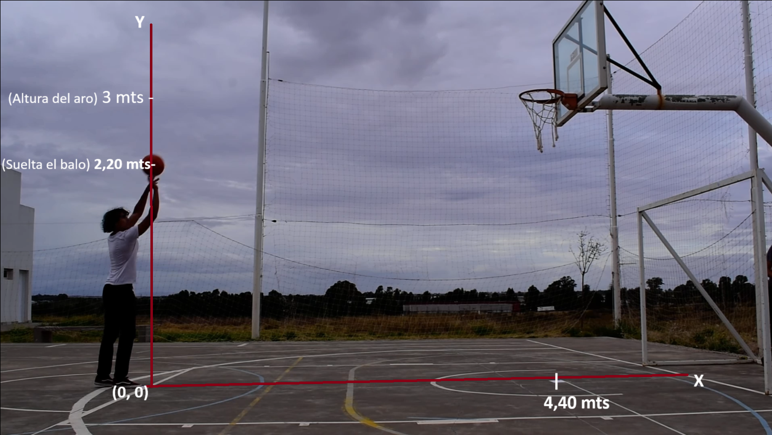

imagen en inicial en tiempo:  0.0 s.


In [4]:
# Abre la imagen
imagen = Image.open(ruta_imagen_inicio)
# Redimensionamos
imagen_redimensionada = imagen.resize((imagen.width // 2, imagen.height // 2))
# Muestra la imagen
display(imagen_redimensionada)
print("imagen en inicial en tiempo: ", segundos_array[0], "s."  )

>Las ecuaciones de la cinemática, que relacionan la posición final, la posición inicial, la velocidad inicial, la velocidad final, la aceleración y el tiempo, son las siguientes:



1. **Ecuación de posición sin aceleración:**
   $$ \mathbf{r} = \mathbf{r}_0 + \mathbf{v}_0 \cdot t $$

2. **Ecuación de velocidad sin aceleración:**
   $$ \mathbf{v} = \mathbf{v}_0 $$

3. **Ecuación de posición con aceleración constante:**
   $$ \mathbf{r} = \mathbf{r}_0 + \mathbf{v}_0 \cdot t + \frac{1}{2} \cdot \mathbf{a} \cdot t^2 $$

4. **Ecuación de velocidad con aceleración constante:**
   $$ \mathbf{v} = \mathbf{v}_0 + \mathbf{a} \cdot t $$



>Vamos a comenzar dividiendo los vectores posicion, velocidad y aceleración en los ejes **x** e **y**


* Para el **vector posicion**
\
\begin{cases}
r_x =x \\
r_y = y
\end{cases}

* Para el **vector velocidad**
\
\begin{cases}
v_x = v \cdot \sin(\theta) \\
v_y = v \cdot \cos(\theta)
\end{cases}

* Para el **vector aceleracion**
\
\begin{cases}
a_x = 0\\
a_y = -9.81 m/s^2
\end{cases}


# Momento de altura maxima para calcular la velocidad inicial



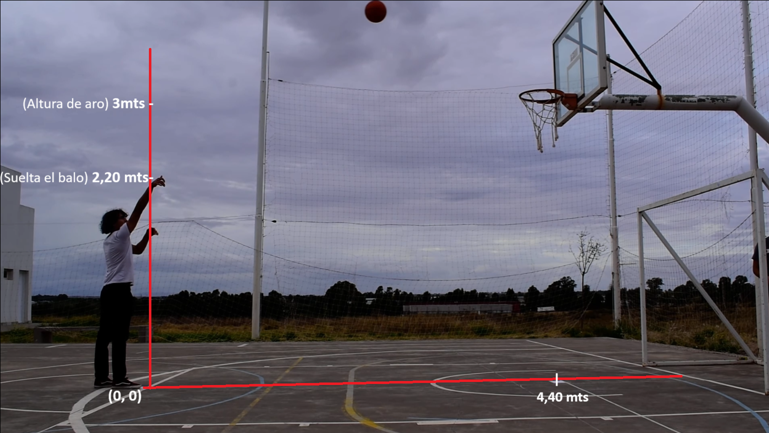

imagen en punto maximo en tiempo:  0.6 s.


In [5]:

# Abre la imagen
imagen = Image.open(ruta_imagen_altura_max)
# Redimensionamos
imagen_redimensionada = imagen.resize((imagen.width // 2, imagen.height // 2))
# Muestra la imagen
display(imagen_redimensionada)
print("imagen en punto maximo en tiempo: ", segundos_array[1], "s."  )

### Analisis para la velocidad Inicial en un Ejemplo puntual
#### En eje Y
A partir de aquí podemos deducir que en el punto maximo la **velociadad en Y** es "0" ya que llega a su punto maximo gracias al video obtenemos como dato el tiempo de la altura maxima que es "0.56s"

**Reemplazando en la ecuacion de velocidad con aceleración constante:**
   $$ \mathbf{0} = \mathbf{v}_0y - \mathbf{9.81} m/s^2 \cdot 0.56s $$
   $$ \mathbf{v}_0y = \mathbf{9.81} m/s^2 \cdot 0.56 s $$
   $$ \mathbf{v}_0y = 5.49 m/s $$

#### En eje X
Como en el eje X la aceleracion es cero podemos calcular la velocidad inicial en **x**
   $$ \mathbf{x}_f = \mathbf{x}_0 + \mathbf{v}_0x \cdot t $$
   $$ 4,40mts = 0mts + \mathbf{v}_0x \cdot 1.02s $$
   $$ \mathbf{v}_0x = 4,31m/s $$

#### Calculo del Vector velocidad

  $$  V = \sqrt{v_x^2 + v_y^2} $$
  $$  V = \sqrt{4,31^2 + 5,49^2 } $$
  $$  V = 6.97 m/s $$

#### Calculo del angulo para el vector velocidad
  $$v_x = v \cdot \sin(\theta)  $$
  $$4,31 m/s = 6.97 m/s \cdot \sin(\theta)  $$
  $$ \theta = 38,19°  $$


### Analisis para la poscion maxima del balon
#### En eje Y
Con la velocidad inicial en y calculada, podemos saber el la altura maxima
**Ecuación de posición con aceleración constante:**
   $$ \mathbf{y}_m = \mathbf{y}_0 + \mathbf{v}_0y \cdot t + \frac{1}{2} \cdot \mathbf{a} \cdot t^2 $$
   $$ \mathbf{y}_m = \mathbf{2,20}mts + \mathbf{5.49} m/s \cdot 0,56 s - \frac{1}{2} \cdot \mathbf{9,81} m/s^2 \cdot (0,56)^2 s^2 $$

   $$ \mathbf{y}_m = 3.73 mts $$


#### En eje X
  Como en el eje X la aceleracion es cero podemos calcular la posicion maxima en **x**
   $$ \mathbf{x}_m = \mathbf{x}_0 + \mathbf{v}_0x \cdot t $$
   $$ \mathbf{x}_m = 0mts + 4,15m/s \cdot 0.6s $$
   $$ \mathbf{x}_m  = 2,32m $$

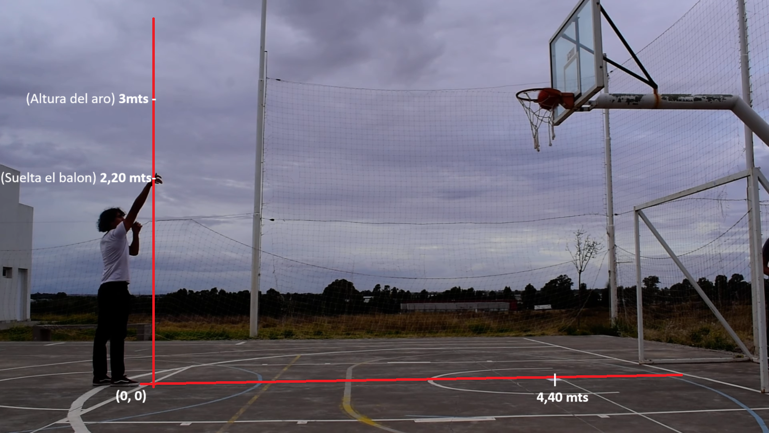

imagen en final en tiempo:  1.0666666666666667 s.


In [6]:
# Abre la imagen
imagen_final = Image.open(ruta_imagen_final)
# Redimensionamos
imagen_redimensionada = imagen_final.resize((imagen.width // 2, imagen.height // 2))
# Muestra la imagen
display(imagen_redimensionada)
print("imagen en final en tiempo: ", segundos_array[2], "s."  )

# confeccion de formula para obtener un Array de trayectoria

In [7]:


def calcular_posiciones_altura_maxima(x0, y0, xf, altura_maxima_time, tiempo_final):
    # Constante de aceleración
    a = 9.81  # m/s^2

    # Calculando velocidad inicial en y
    v0y = a * altura_maxima_time

    # Calculando velocidad inicial en x
    v0x = xf / tiempo_final

    # Calculando altura máxima
    ym = y0 + v0y * altura_maxima_time - 0.5 * a * altura_maxima_time ** 2

    # Calculando posición máxima en x
    xm = v0x * altura_maxima_time

    # Calculando velocidad total y ángulo
    V = np.sqrt(v0x ** 2 + v0y ** 2)
    theta = np.arcsin(v0x / V)

    # Tiempo total en segundos
    tiempo_total = np.arange(0, tiempo_final, 0.01)

    # Arrays para almacenar las posiciones en x, y, y el tiempo
    posiciones_x = []
    posiciones_y = []
    tiempos = []

    # Calculando posición en x, posición en y, y tiempo para cada intervalo de 10 ms
    for t in tiempo_total:
              # Posición en x
              x = v0x * t
              posiciones_x.append(x)
              # Posición en y
              y = y0 + v0y * t - 0.5 * a * t ** 2
              posiciones_y.append(y)
              # Tiempo
              tiempos.append(t)
    return np.array(posiciones_x), np.array(posiciones_y), np.array(tiempos)

# Datos de entrada
x0 = 0  # Posición inicial en x
y0 = 2.20  # Posición inicial en y
xf = 4.40  # Posición final en x
altura_maxima_time = 0.6  # Tiempo en segundos en el que alcanza la altura máxima
tiempo_final = 1.06  # Tiempo final en segundos

# Llamada a la función
pos_x, pos_y, tiempos = calcular_posiciones_altura_maxima(x0, y0, xf, altura_maxima_time, tiempo_final)



# Crear DataFrame
df_teoria = pd.DataFrame({
    'pos_x_teoria':  pos_x,
    'pos_y_teoria': pos_y,
    'tiempos_teoria': tiempos
})
df_teoria.head()


,pos_x_teoria,pos_y_teoria,tiempos_teoria
0,0.000000,2.200000,0.00
1,0.041509,2.258370,0.01
2,0.083019,2.315758,0.02
3,0.124528,2.372165,0.03
4,0.166038,2.427592,0.04


In [8]:
from PIL import Image

# Carga la imagen
imagen = Image.open(ruta_secuencia)  # Cambia "nombre_de_la_imagen.jpg" por el nombre de tu imagen

# Obtiene el alto y ancho de la imagen
ancho, alto = imagen.size

# Imprime el alto y ancho en pixeles
print("Alto de la imagen:", alto, "píxeles")
print("Ancho de la imagen:", ancho, "píxeles")


Alto de la imagen: 1080 píxeles
Ancho de la imagen: 1920 píxeles


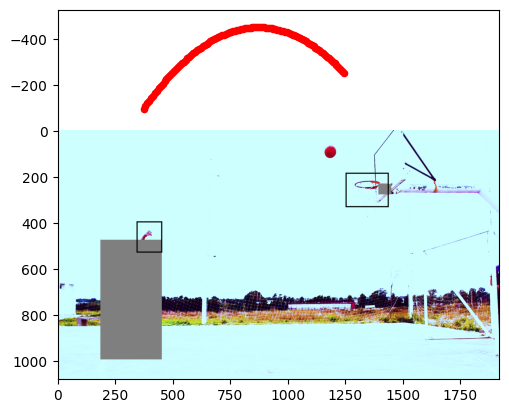

In [9]:
import matplotlib.pyplot as plt

# Dibuja un punto en las coordenadas (x, y) en la imagen
def dibujar_punto(imagen, x, y):
    plt.imshow(imagen)
    plt.scatter(x, y, color='red', s=20)  # s es el tamaño del punto
    plt.show()

# Supongamos que tienes una imagen llamada 'imagen' ya cargada

# Coordenadas del punto que deseas dibujar
x_punto = 373
y_punto = 343

# Dibujar el punto en la imagen
dibujar_punto(imagen, x_punto + ( pos_x* 200), y_punto -(pos_y*200))





Conclusiones:
El proyecto proporcionará una comprensión más profunda de los principios de tiro oblicuo y cinemática, así como su relevancia en diversos contextos. Además, permitirá explorar las limitaciones y las aplicaciones prácticas de los modelos teóricos en situaciones reales.

Referencias:
Se hará referencia a libros de texto, artículos científicos y recursos en línea sobre física, tiro oblicuo y cinemática para respaldar el desarrollo del proyecto.

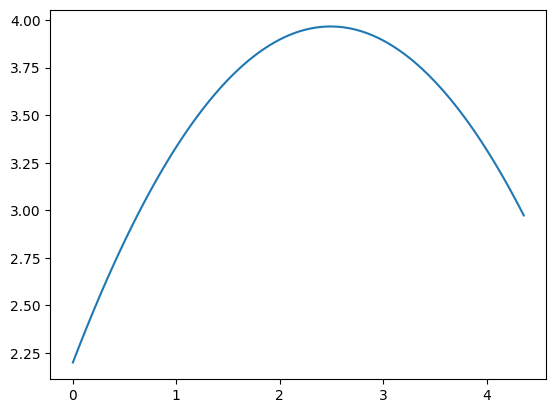

In [10]:
plt.plot(pos_x,pos_y)

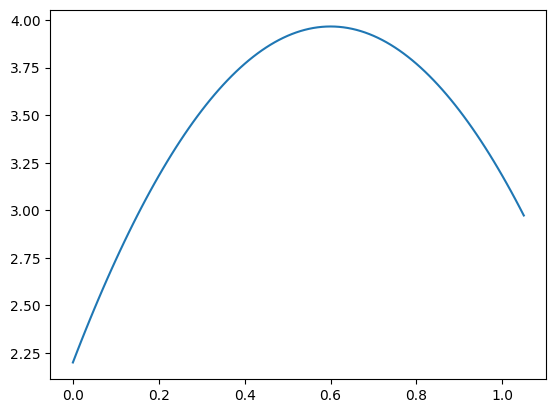

In [11]:
plt.plot(tiempos,pos_y)

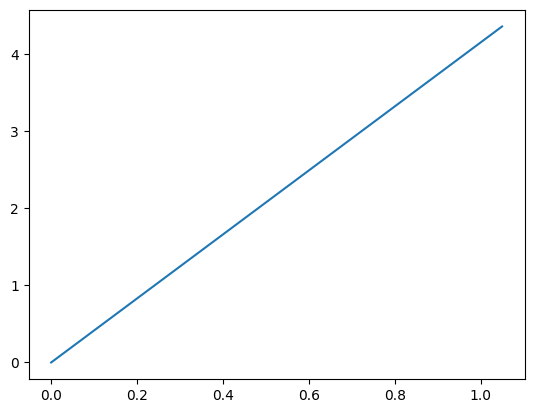

In [12]:
plt.plot(tiempos,pos_x)

# Comparamos con los datos obtenidos del experimentos


para esto es necesario cargar el trakeo del balon

In [13]:
df_ruta_2 = '/content/drive/MyDrive/Fisica/data/data.csv'

In [14]:
import pandas as pd

# Leer el archivo CSV
df_2 = pd.read_csv(df_ruta_2)

# Mostrar las primes filas del archivo CSV
df_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32 entries, 0 to 31
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   X       32 non-null     int64
 1   Y       32 non-null     int64
dtypes: int64(2)
memory usage: 640.0 bytes


In [15]:
df_2.head()

,X,Y
0,350,454
1,380,412
2,413,368
3,446,327
4,480,288


In [16]:


# Eliminar las columnas indeseadas

# Definir el factor de conversión de píxeles a metros
factor_conversion = 1 / 243

# Convertir las columnas PosX y PosY de píxeles a metros
df_2['PosX_metros'] = df_2['X'] * factor_conversion
df_2['PosY_metros'] = df_2['Y'] * factor_conversion

df_2['Tiempo'] = df_2.index * (1/30)  # Convertir el tiempo en segundos
# Mostrar las primeras filas del DataFrame con las nuevas columnas
df_2.head()



,X,Y,PosX_metros,PosY_metros,Tiempo
0,350,454,1.440329,1.868313,0.000000
1,380,412,1.563786,1.695473,0.033333
2,413,368,1.699588,1.514403,0.066667
3,446,327,1.835391,1.345679,0.100000
4,480,288,1.975309,1.185185,0.133333


In [17]:

df_2['PosX_metros'] = df_2['PosX_metros'] - df_2['PosX_metros'].iloc[0]
df_2['PosY_metros'] =  - (df_2['PosY_metros'] - df_2['PosY_metros'].iloc[0]) + 2.20
df_2.head()

,X,Y,PosX_metros,PosY_metros,Tiempo
0,350,454,0.000000,2.200000,0.000000
1,380,412,0.123457,2.372840,0.033333
2,413,368,0.259259,2.553909,0.066667
3,446,327,0.395062,2.722634,0.100000
4,480,288,0.534979,2.883128,0.133333


In [18]:
df_2.drop(columns=[  "X", "Y"], inplace=True)
df_2.head()

,PosX_metros,PosY_metros,Tiempo
0,0.000000,2.200000,0.000000
1,0.123457,2.372840,0.033333
2,0.259259,2.553909,0.066667
3,0.395062,2.722634,0.100000
4,0.534979,2.883128,0.133333


In [19]:
# Calcular las velocidades (primera derivada de las posiciones respecto al tiempo)
df_2['VelX'] = np.gradient(df_2['PosX_metros'], df_2['Tiempo'])
df_2['VelY'] = np.gradient(df_2['PosY_metros'], df_2['Tiempo'])

# Calcular las aceleraciones (segunda derivada de las posiciones respecto al tiempo)
df_2['AccX'] = np.gradient(df_2['VelX'], df_2['Tiempo'])
df_2['AccY'] = np.gradient(df_2['VelY'], df_2['Tiempo'])

# Mostrar las primeras filas del DataFrame para verificar los cambios
df_2.head()


,PosX_metros,PosY_metros,Tiempo,VelX,VelY,AccX,AccY
0,0.000000,2.200000,0.000000,3.703704,5.185185,5.555556e+00,3.703704
1,0.123457,2.372840,0.033333,3.888889,5.308642,5.555556e+00,0.925926
2,0.259259,2.553909,0.066667,4.074074,5.246914,3.703704e+00,-5.555556
3,0.395062,2.722634,0.100000,4.135802,4.938272,1.851852e+00,-10.185185
4,0.534979,2.883128,0.133333,4.197531,4.567901,-2.131628e-14,-11.111111


In [20]:
df_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32 entries, 0 to 31
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PosX_metros  32 non-null     float64
 1   PosY_metros  32 non-null     float64
 2   Tiempo       32 non-null     float64
 3   VelX         32 non-null     float64
 4   VelY         32 non-null     float64
 5   AccX         32 non-null     float64
 6   AccY         32 non-null     float64
dtypes: float64(7)
memory usage: 1.9 KB


In [21]:
df_teoria

,pos_x_teoria,pos_y_teoria,tiempos_teoria
0,0.000000,2.200000,0.00
1,0.041509,2.258370,0.01
2,0.083019,2.315758,0.02
3,0.124528,2.372165,0.03
4,0.166038,2.427592,0.04
...,...,...,...
101,4.192453,3.141270,1.01
102,4.233962,3.100558,1.02
103,4.275472,3.058865,1.03
104,4.316981,3.016192,1.04


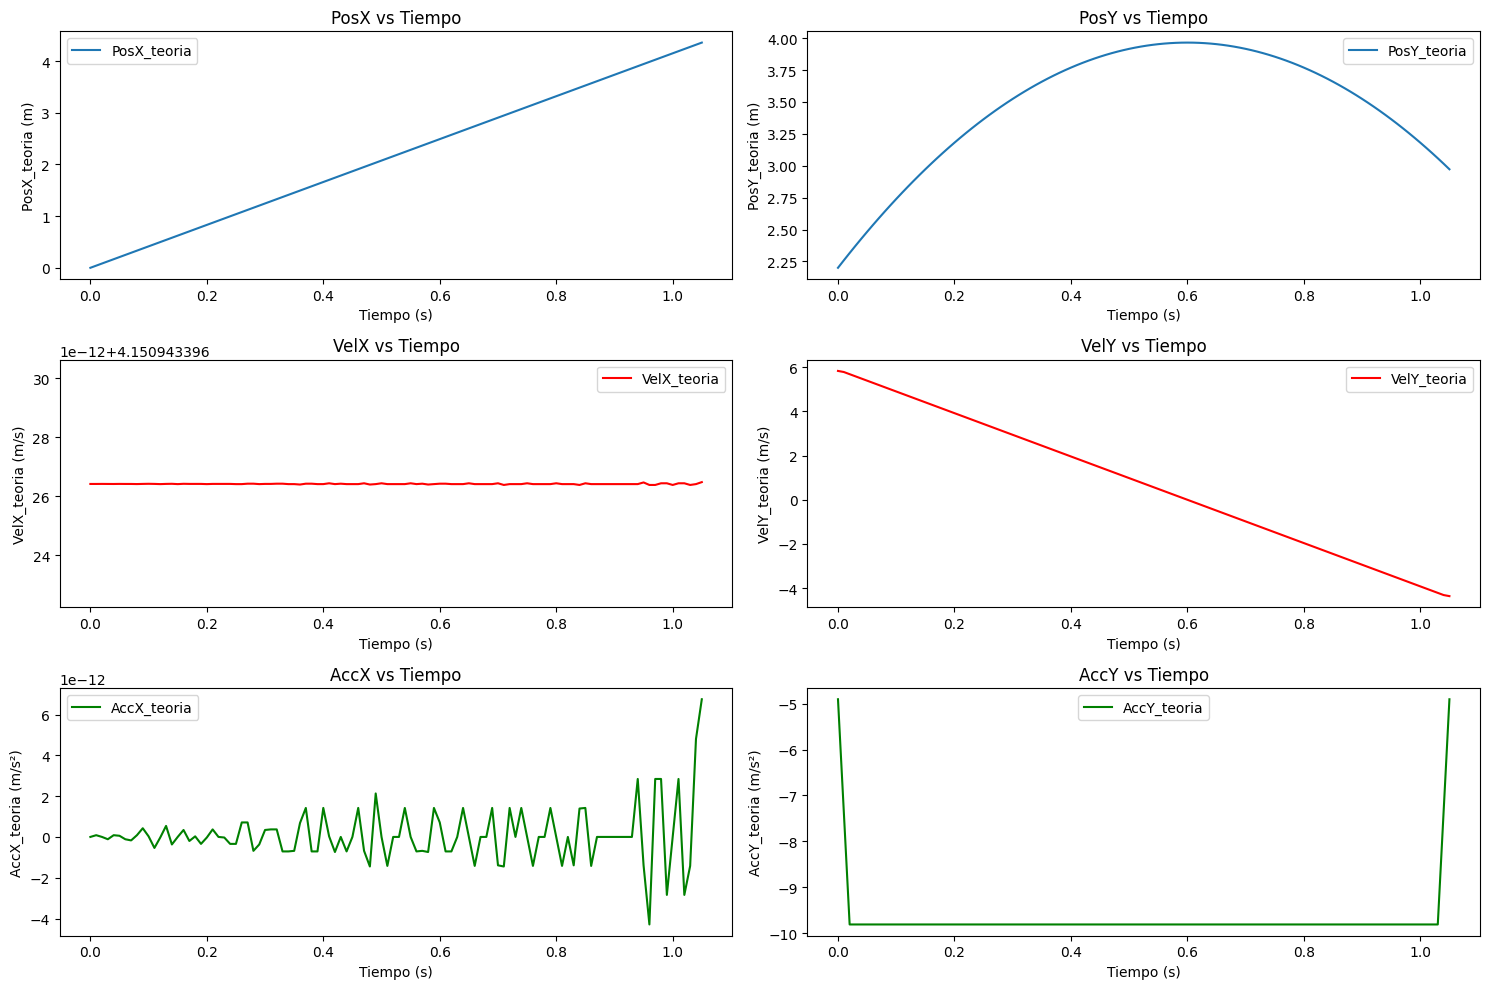

In [22]:

# Calcular las velocidades (primera derivada de las posiciones respecto al tiempo)
df_teoria['vel_x_teoria'] = np.gradient(df_teoria['pos_x_teoria'], df_teoria['tiempos_teoria'])
df_teoria['vel_y_teoria'] = np.gradient(df_teoria['pos_y_teoria'], df_teoria['tiempos_teoria'])

# Calcular las aceleraciones (segunda derivada de las posiciones respecto al tiempo)
df_teoria['acc_x_teoria'] = np.gradient(df_teoria['vel_x_teoria'], df_teoria['tiempos_teoria'])
df_teoria['acc_y_teoria'] = np.gradient(df_teoria['vel_y_teoria'], df_teoria['tiempos_teoria'])

# Graficar Posiciones, Velocidades y Aceleraciones en función del tiempo
fig, axs = plt.subplots(3, 2, figsize=(15, 10))

# Graficar Posiciones
axs[0, 0].plot(df_teoria['tiempos_teoria'], df_teoria['pos_x_teoria'], label='PosX_teoria')
axs[0, 0].set_title('PosX vs Tiempo')
axs[0, 0].set_xlabel('Tiempo (s)')
axs[0, 0].set_ylabel('PosX_teoria (m)')
axs[0, 0].legend()

axs[0, 1].plot(df_teoria['tiempos_teoria'], df_teoria['pos_y_teoria'], label='PosY_teoria')
axs[0, 1].set_title('PosY vs Tiempo')
axs[0, 1].set_xlabel('Tiempo (s)')
axs[0, 1].set_ylabel('PosY_teoria (m)')
axs[0, 1].legend()

# Graficar Velocidades
axs[1, 0].plot(df_teoria['tiempos_teoria'], df_teoria['vel_x_teoria'], label='VelX_teoria', color='r')
axs[1, 0].set_title('VelX vs Tiempo')
axs[1, 0].set_xlabel('Tiempo (s)')
axs[1, 0].set_ylabel('VelX_teoria (m/s)')
axs[1, 0].legend()

axs[1, 1].plot(df_teoria['tiempos_teoria'], df_teoria['vel_y_teoria'], label='VelY_teoria', color='r')
axs[1, 1].set_title('VelY vs Tiempo')
axs[1, 1].set_xlabel('Tiempo (s)')
axs[1, 1].set_ylabel('VelY_teoria (m/s)')
axs[1, 1].legend()

# Graficar Aceleraciones
axs[2, 0].plot(df_teoria['tiempos_teoria'], df_teoria['acc_x_teoria'], label='AccX_teoria', color='g')
axs[2, 0].set_title('AccX vs Tiempo')
axs[2, 0].set_xlabel('Tiempo (s)')
axs[2, 0].set_ylabel('AccX_teoria (m/s²)')
axs[2, 0].legend()

axs[2, 1].plot(df_teoria['tiempos_teoria'], df_teoria['acc_y_teoria'], label='AccY_teoria', color='g')
axs[2, 1].set_title('AccY vs Tiempo')
axs[2, 1].set_xlabel('Tiempo (s)')
axs[2, 1].set_ylabel('AccY_teoria (m/s²)')
axs[2, 1].legend()

plt.tight_layout()
plt.show()

In [23]:
df_teoria.head()

,pos_x_teoria,pos_y_teoria,tiempos_teoria,vel_x_teoria,vel_y_teoria,acc_x_teoria,acc_y_teoria
0,0.000000,2.200000,0.00,4.150943,5.83695,0.000000e+00,-4.9050
1,0.041509,2.258370,0.01,4.150943,5.78790,8.526513e-14,-7.3575
2,0.083019,2.315758,0.02,4.150943,5.68980,0.000000e+00,-9.8100
3,0.124528,2.372165,0.03,4.150943,5.59170,-1.136868e-13,-9.8100
4,0.166038,2.427592,0.04,4.150943,5.49360,8.526513e-14,-9.8100


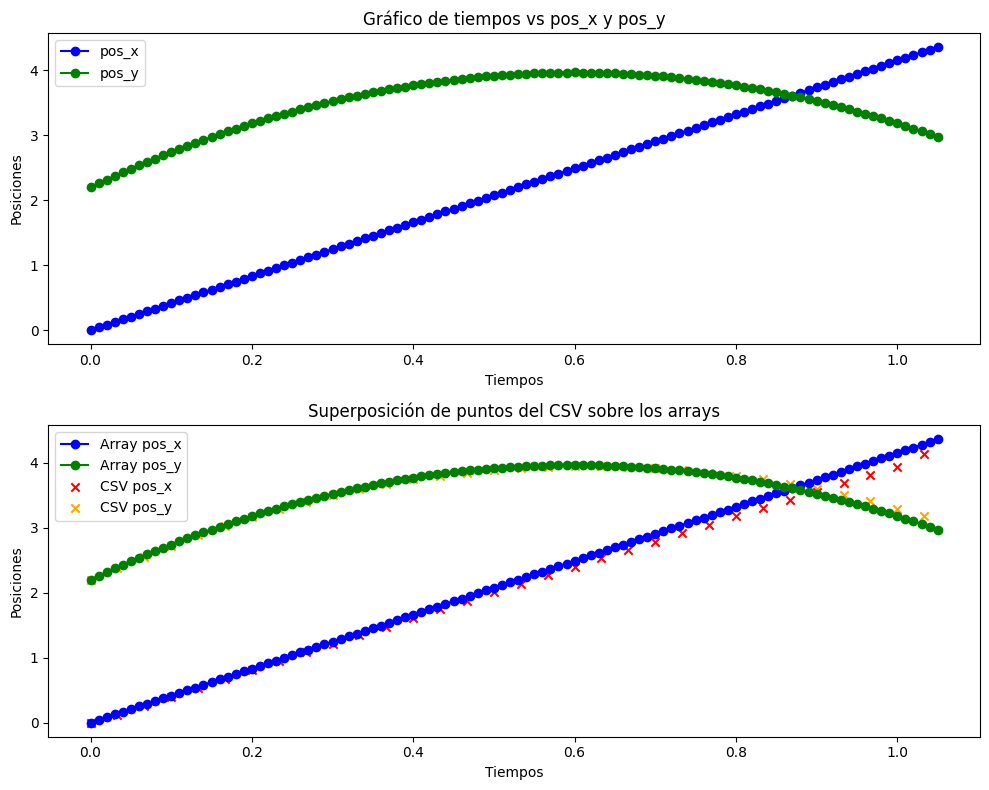

In [24]:
csv_tiempos = df_2['Tiempo']
csv_pos_x = df_2['PosX_metros']
csv_pos_y = df_2['PosY_metros']

# Crear la figura y los subplots
fig, ax = plt.subplots(2, 1, figsize=(10, 8))

# Primer gráfico: tiempos vs pos_x y pos_y
ax[0].plot(tiempos, pos_x, label='pos_x', color='blue', marker='o')
ax[0].plot(tiempos, pos_y, label='pos_y', color='green', marker='o')
ax[0].set_title('Gráfico de tiempos vs pos_x y pos_y')
ax[0].set_xlabel('Tiempos')
ax[0].set_ylabel('Posiciones')
ax[0].legend()

# Segundo gráfico: superponer CSV pos_x y pos_y sobre los arrays pos_x y pos_y
ax[1].plot(tiempos, pos_x, label='Array pos_x', color='blue', marker='o')
ax[1].plot(tiempos, pos_y, label='Array pos_y', color='green', marker='o')
ax[1].scatter(csv_tiempos, csv_pos_x, label='CSV pos_x', color='red', marker='x')
ax[1].scatter(csv_tiempos, csv_pos_y, label='CSV pos_y', color='orange', marker='x')
ax[1].set_title('Superposición de puntos del CSV sobre los arrays')
ax[1].set_xlabel('Tiempos')
ax[1].set_ylabel('Posiciones')
ax[1].legend()

# Ajustar el espacio entre subplots
plt.tight_layout()

# Mostrar los gráficos
plt.show()


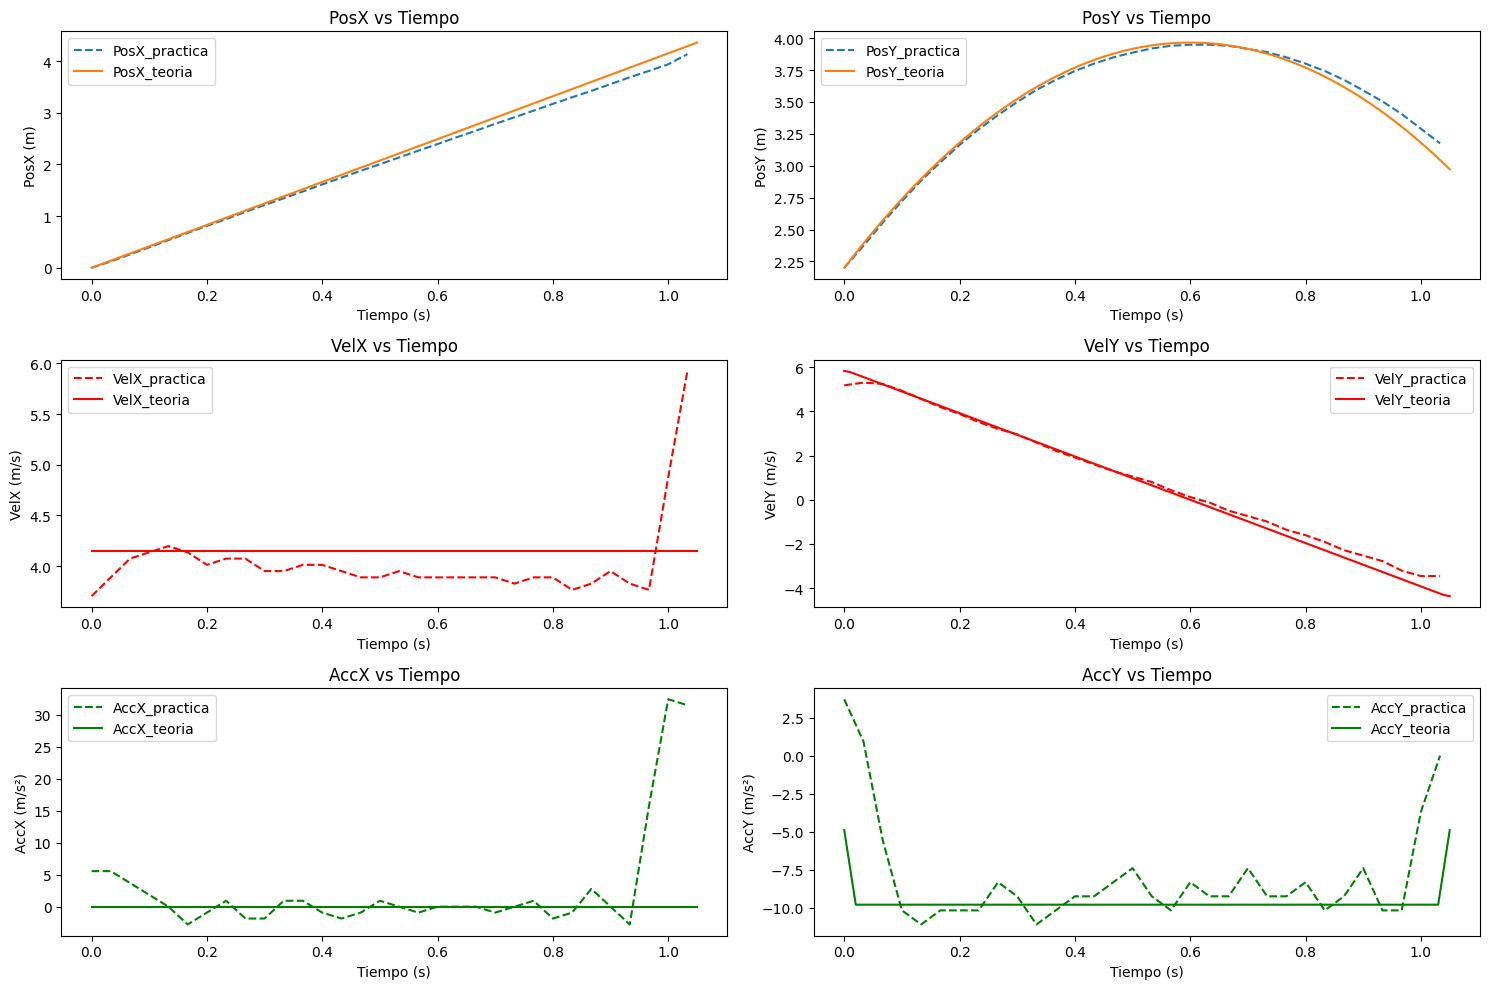

In [25]:


fig, axs = plt.subplots(3, 2, figsize=(15, 10))

# Graficar Posiciones
axs[0, 0].plot(df_2['Tiempo'], df_2['PosX_metros'], label='PosX_practica', linestyle='--')
axs[0, 0].plot(df_teoria['tiempos_teoria'], df_teoria['pos_x_teoria'], label='PosX_teoria')
axs[0, 0].set_title('PosX vs Tiempo')
axs[0, 0].set_xlabel('Tiempo (s)')
axs[0, 0].set_ylabel('PosX (m)')
axs[0, 0].legend()

axs[0, 1].plot(df_2['Tiempo'], df_2['PosY_metros'], label='PosY_practica', linestyle='--')
axs[0, 1].plot(df_teoria['tiempos_teoria'], df_teoria['pos_y_teoria'], label='PosY_teoria')
axs[0, 1].set_title('PosY vs Tiempo')
axs[0, 1].set_xlabel('Tiempo (s)')
axs[0, 1].set_ylabel('PosY (m)')
axs[0, 1].legend()

# Graficar Velocidades
axs[1, 0].plot(df_2['Tiempo'], df_2['VelX'], label='VelX_practica', linestyle='--', color='r')
axs[1, 0].plot(df_teoria['tiempos_teoria'], df_teoria['vel_x_teoria'], label='VelX_teoria', color='r')
axs[1, 0].set_title('VelX vs Tiempo')
axs[1, 0].set_xlabel('Tiempo (s)')
axs[1, 0].set_ylabel('VelX (m/s)')
axs[1, 0].legend()

axs[1, 1].plot(df_2['Tiempo'], df_2['VelY'], label='VelY_practica', linestyle='--', color='r')
axs[1, 1].plot(df_teoria['tiempos_teoria'], df_teoria['vel_y_teoria'], label='VelY_teoria', color='r')
axs[1, 1].set_title('VelY vs Tiempo')
axs[1, 1].set_xlabel('Tiempo (s)')
axs[1, 1].set_ylabel('VelY (m/s)')
axs[1, 1].legend()

# Graficar Aceleraciones
axs[2, 0].plot(df_2['Tiempo'], df_2['AccX'], label='AccX_practica', linestyle='--', color='g')
axs[2, 0].plot(df_teoria['tiempos_teoria'], df_teoria['acc_x_teoria'], label='AccX_teoria', color='g')
axs[2, 0].set_title('AccX vs Tiempo')
axs[2, 0].set_xlabel('Tiempo (s)')
axs[2, 0].set_ylabel('AccX (m/s²)')
axs[2, 0].legend()

axs[2, 1].plot(df_2['Tiempo'], df_2['AccY'], label='AccY_practica', linestyle='--', color='g')
axs[2, 1].plot(df_teoria['tiempos_teoria'], df_teoria['acc_y_teoria'], label='AccY_teoria', color='g')
axs[2, 1].set_title('AccY vs Tiempo')
axs[2, 1].set_xlabel('Tiempo (s)')
axs[2, 1].set_ylabel('AccY (m/s²)')
axs[2, 1].legend()

plt.tight_layout()
plt.show()

In [26]:
file_path = '/content/drive/MyDrive/Fisica/data/data_teoria.csv'
df_teoria.to_csv(file_path, index=False)

print(f"Archivo guardado en: {file_path}")

Archivo guardado en: /content/drive/MyDrive/Fisica/data/data_teoria.csv


In [27]:
file_path = '/content/drive/MyDrive/Fisica/data/data_exp.csv'
df_2.to_csv(file_path, index=False)

print(f"Archivo guardado en: {file_path}")

Archivo guardado en: /content/drive/MyDrive/Fisica/data/data_exp.csv
